In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import folium
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from haversine import haversine, Unit


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train.csv')
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2209155,2,2016-05-03 09:03:08,2016-05-03 09:17:12,2,-73.979813,40.752529,-73.982681,40.763680,N,844
1,id0586605,1,2016-01-01 16:40:51,2016-01-01 16:57:32,1,-73.977623,40.746296,-73.968414,40.788933,N,1001
2,id0467144,1,2016-04-24 13:57:03,2016-04-24 14:14:31,1,-73.950699,40.779404,-73.863129,40.768608,N,1048
3,id0989010,2,2016-01-10 17:03:47,2016-01-10 17:16:51,1,-73.984558,40.721802,-73.976753,40.752213,N,784
4,id0580742,1,2016-02-25 17:37:36,2016-02-25 17:49:48,1,-73.967720,40.768742,-73.977173,40.789875,N,732
...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,2,2016-03-25 07:11:49,2016-03-25 07:33:10,2,-73.955032,40.777328,-74.006203,40.749424,N,1281
1021046,id2204747,1,2016-02-16 18:01:45,2016-02-16 18:15:38,1,-73.973618,40.763920,-73.983849,40.749874,N,833
1021047,id3043606,2,2016-01-26 19:22:29,2016-01-26 19:43:54,1,-74.006195,40.734283,-73.949608,40.785282,N,1285
1021048,id1458584,1,2016-01-19 11:53:47,2016-01-19 12:00:16,1,-73.962341,40.767323,-73.969757,40.768669,N,389


In [4]:
test = pd.read_csv('test.csv')
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N
...,...,...,...,...,...,...,...,...,...
437589,id2411525,1,2016-05-25 17:07:59,2,-73.983505,40.766369,-73.984795,40.785965,N
437590,id3782154,1,2016-06-11 11:18:45,1,-73.968147,40.800476,-73.953979,40.787643,N
437591,id0699942,2,2016-05-20 06:30:38,5,-74.006210,40.733158,-73.997932,40.722610,N
437592,id3422152,1,2016-03-06 22:37:19,2,-73.990089,40.728859,-73.991234,40.765404,N


**Пропущенные значения**

In [5]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

**Их нет**

In [7]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

В колонке `dropoff_datetime` содержится информация о времени окончания поездки, однако эта колонка присутствует только в обучающей выборке и отсутствует в тестовой, поэтому удалим. Еще закастуем к `datetime` поле `pickup_datetime`.

<span style="color:red; font-size: 24px;">
Красным шрифтом я буду обозначать важные изменения в данных.

Здесь: каст к datetime поля `pickup_datetime`
</span>


In [8]:
train.drop(['dropoff_datetime'], axis=1, inplace= True)
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [9]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

**Посмотрим на распределение целевой переменной**

Text(0.5, 1.0, 'Распределение времени поездок на такси')

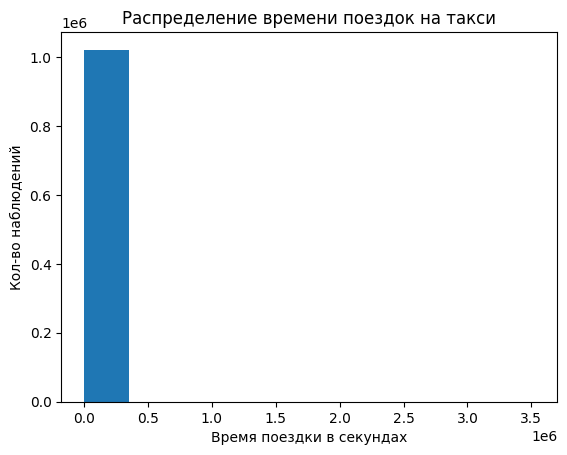

In [10]:
plt.hist(train['trip_duration'])
plt.xlabel('Время поездки в секундах')
plt.ylabel('Кол-во наблюдений')
plt.title('Распределение времени поездок на такси')

Видим, что строится неинформативная гистограмма, очевидно из-за наличия выбросов в данных. Построим гистограмму только на тех данных, которые не превосходят 99 квантиль.

In [11]:
quantile_99 = train['trip_duration'].quantile(0.99)
quantile_01 = train['trip_duration'].quantile(0.01)

Text(0.5, 1.0, 'Распределение времени поездок на такси')

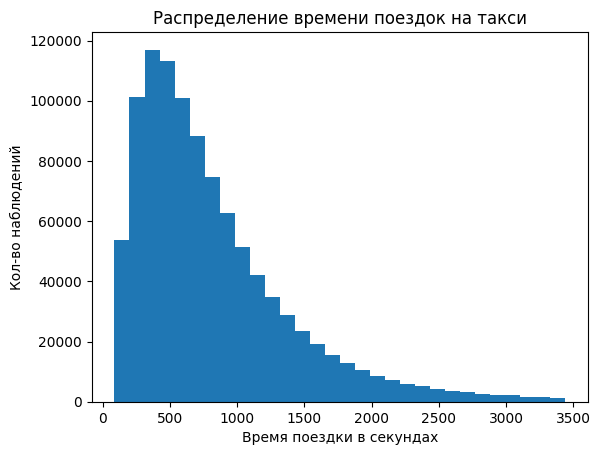

In [12]:
popular_duration = train['trip_duration'].loc[(train['trip_duration'] < quantile_99) & (train['trip_duration'] > quantile_01)]
plt.hist(popular_duration, bins= 30)
plt.xlabel('Время поездки в секундах')
plt.ylabel('Кол-во наблюдений')
plt.title('Распределение времени поездок на такси')

Теперь гистограмма стала более информативной. Наше распределение очень напоминает логнормальное. Можно попробовать построить гистограмму по логорифмированным данным

Text(0.5, 1.0, 'Распределение времени поездок на такси')

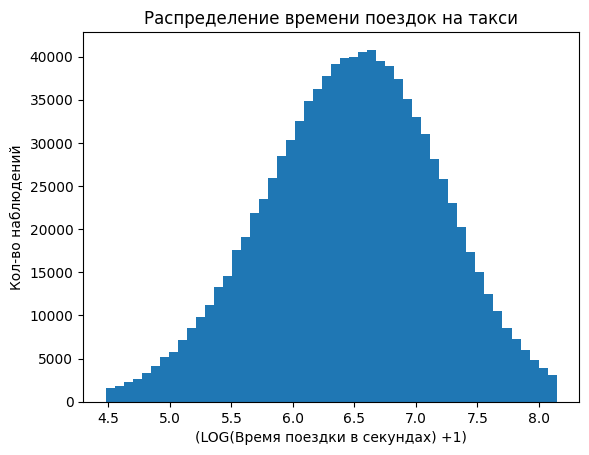

In [13]:
plt.hist(np.log(popular_duration + 1), bins=50)
plt.xlabel('(LOG(Время поездки в секундах) +1)')
plt.ylabel('Кол-во наблюдений')
plt.title('Распределение времени поездок на такси')

<span style="color:red; font-size: 24px;">

Здесь: Добавим признак `log_duration`
</span>


In [14]:
train['log_duration'] = np.log(train['trip_duration'] + 1)


In [15]:
print('max duration = ', train['trip_duration'].max(), '\nmin duration = ', train['trip_duration'].min())

max duration =  3526282 
min duration =  1


**Посмотрим на то, как выглядят квантили, чтобы понять, что считать выбросами и удалить**

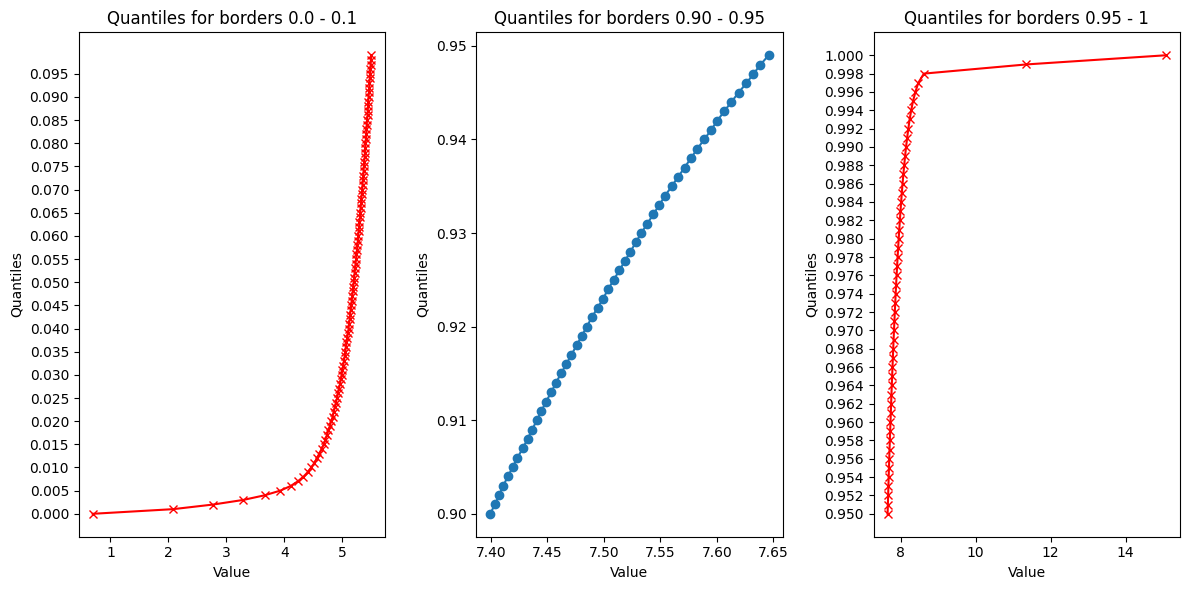

In [16]:
quantiles1 = []
for i in np.arange(0.90, 0.95, 0.001):
    quantiles1.append(np.quantile(train['log_duration'], i))

quantiles2 = []
for i in np.arange(0.0, 0.1, 0.001):
    quantiles2.append(np.quantile(train['log_duration'], i))

quantiles3 = []
for i in np.arange(0.95, 1, 0.001):
    quantiles3.append(np.quantile(train['log_duration'], i))


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 2)  
plt.plot(quantiles1, np.arange(0.90, 0.95, 0.001),  marker='o')
# plt.yscale('log')
plt.title('Quantiles for borders 0.90 - 0.95')
plt.xlabel('Value')
plt.ylabel('Quantiles')

plt.subplot(1, 3, 1)  
plt.plot(quantiles2, np.arange(0.0, 0.1, 0.001),  marker='x', color='r')
# plt.yscale('log')
plt.yticks(np.arange(0.0, 0.1, 0.005))
plt.title('Quantiles for borders 0.0 - 0.1')
plt.xlabel('Value')
plt.ylabel('Quantiles')


plt.subplot(1, 3, 3)  
plt.plot(quantiles3, np.arange(0.95, 1, 0.001),  marker='x', color='r')
plt.yticks(np.arange(0.95, 1, 0.002))
# plt.yscale('log')
plt.title('Quantiles for borders 0.95 - 1')
plt.xlabel('Value')
plt.ylabel('Quantiles')

plt.tight_layout()
plt.show()
    

**Тут мы выборочно построили функцию распределения, чтоб посмотреть, откуда начинаются экстремальные значения**

**Дропну из датасета все значения, выше квантиля 0.998 и ниже квантиля 0.005** поскольку это места, где функция распределения имеет сильно выраженные переломы

In [17]:
lower_quantile = train['trip_duration'].quantile(0.005)
upper_quantile = train['trip_duration'].quantile(0.998)

In [18]:
train.shape

(1021050, 11)

<span style="color:red; font-size: 24px;">
Здесь: Удаление из датасета всех значений, выше квантиля 0.998 и ниже квантиля 0.005 по `trip_duration`
</span>

In [19]:
train = train.loc[(train['trip_duration'] > lower_quantile) & (train['trip_duration'] < upper_quantile)]

In [20]:
train.shape

(1013841, 11)

Выбросы, вероятно, обусловлены человеческим фактором водителя. Скорее всего водитель совершил последнюю поездку перед концом смены и забыл ее завершить сразу, а завершил лишь на следующий день утром. А один вообще не выключал таймер 3.5 миллиона секунд, то есть 40 дней))). А еще в 0.1 процент попадают наблюдения, когда поездка длится где-то 90 000 секунд, т.е сутки. Это может навести на мысль, что водители работают сутки через сутки, т.е водитель забыл выключить в конце смены и выключил в начале следующей. Маленькие же значения могут быть, если поездка начата случайно и тут же отменена. Но это догадки.

<span style="color:red; font-size: 24px;">
Здесь: Добавим вещественных признаков `Hour`, `Day`, `Month` - час, день недели, месяц поездки
</span>

In [21]:
train.loc[:, 'Hour'] = train['pickup_datetime'].dt.hour
train.loc[:, 'Day'] = train['pickup_datetime'].dt.weekday
train.loc[:, 'Month'] = train['pickup_datetime'].dt.month

/tmp/ipykernel_2199/1140192612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Hour'] = train['pickup_datetime'].dt.hour
/tmp/ipykernel_2199/1140192612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Day'] = train['pickup_datetime'].dt.weekday
/tmp/ipykernel_2199/1140192612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [22]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_duration,Hour,Day,Month
0,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,844,6.739337,9,1,5
1,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,1001,6.909753,16,4,1
2,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,1048,6.955593,13,6,4
3,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,784,6.665684,17,6,1
4,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,732,6.597146,17,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,1281,7.156177,7,4,3
1021046,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,833,6.726233,18,1,2
1021047,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,1285,7.159292,19,1,1
1021048,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,389,5.966147,11,1,1


**Выделим аномальные дни**

In [37]:
train['anomaly_day'] = np.where(
    (train['pickup_datetime'].dt.date == pd.to_datetime('2016-01-23').date()) |
    (train['pickup_datetime'].dt.date == pd.to_datetime('2016-01-24').date()), 
    1, 
    0
)

/tmp/ipykernel_2199/2017795944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['anomaly_day'] = np.where(


**Посмотрим, как распределено почасовое количество поездок для разных месяцев и для разных дней недели**

Text(39.37998958333333, 0.5, 'Amount of drives')

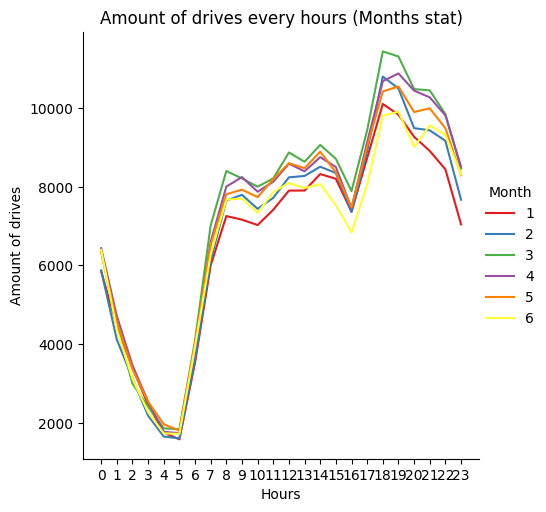

In [41]:
month_hour_grouped = train.groupby(['Month', 'Hour']).size().reset_index(name='Count')


sns.relplot(data = month_hour_grouped, x = 'Hour', y = 'Count', hue = 'Month', kind = 'line', palette="Set1")
plt.title('Amount of drives every hours (Months stat)')
plt.xticks(range(24))
plt.xlabel('Hours')
plt.ylabel('Amount of drives')

Text(39.37998958333333, 0.5, 'Amount of drives')

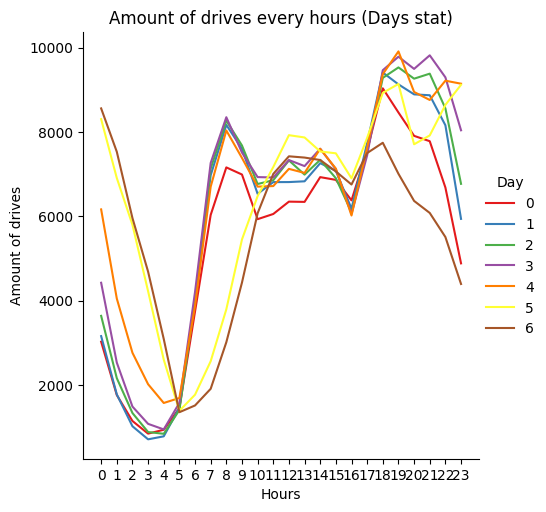

In [42]:
day_hour_grouped = train.groupby(['Day', 'Hour']).size().reset_index(name = 'Count')

sns.relplot(data = day_hour_grouped, x = 'Hour', y = 'Count', hue= 'Day', kind = 'line', palette= 'Set1')
plt.title('Amount of drives every hours (Days stat)')
plt.xticks(range(24))
plt.xlabel('Hours')
plt.ylabel('Amount of drives')

**Посмотрим, как зависит средний логарифм продолжительность поездки в течение суток для разных дней недели и для разных месяцев в году**

Text(36.818927083333335, 0.5, 'Mean log duration')

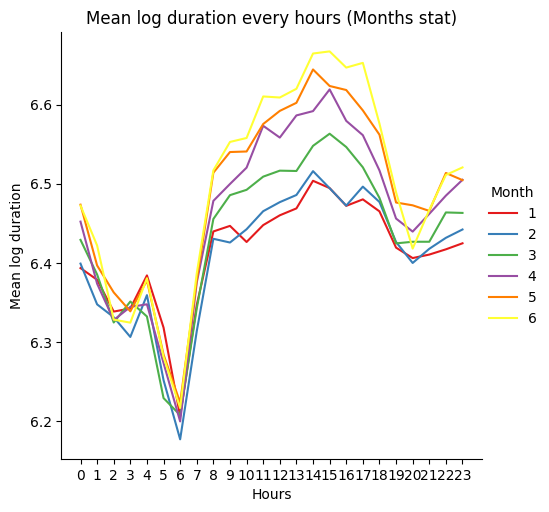

In [43]:
months_hour_duration = train.groupby(['Month', 'Hour']).aggregate({'log_duration': 'mean'}).reset_index()

sns.relplot(data = months_hour_duration, x = 'Hour', y = 'log_duration', hue= 'Month', kind = 'line', palette= 'Set1')
plt.title('Mean log duration every hours (Months stat)')
plt.xticks(range(24))
plt.xlabel('Hours')
plt.ylabel('Mean log duration')

Text(36.818927083333335, 0.5, 'Mean log duration')

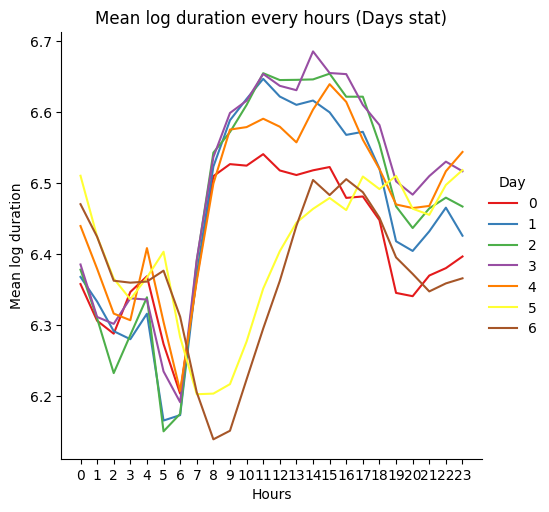

In [44]:
day_hour_duration = train.groupby(['Day', 'Hour']).aggregate({'log_duration': 'mean'}).reset_index()

sns.relplot(data = day_hour_duration, x = 'Hour', y = 'log_duration', hue= 'Day', kind = 'line', palette= 'Set1')
plt.title('Mean log duration every hours (Days stat)')
plt.xticks(range(24))
plt.xlabel('Hours')
plt.ylabel('Mean log duration')

**Посмотрим, как зависит средняя продолжительность поездки от дня недели, от часа и от месяца**

In [45]:
mean_dur_per_hour = train.groupby('Hour').aggregate({'log_duration': 'mean'}).reset_index()
mean_dur_per_days = train.groupby('Day').aggregate({'log_duration': 'mean'}).reset_index()
mean_dur_per_month = train.groupby('Month').aggregate({'log_duration': 'mean'}).reset_index()

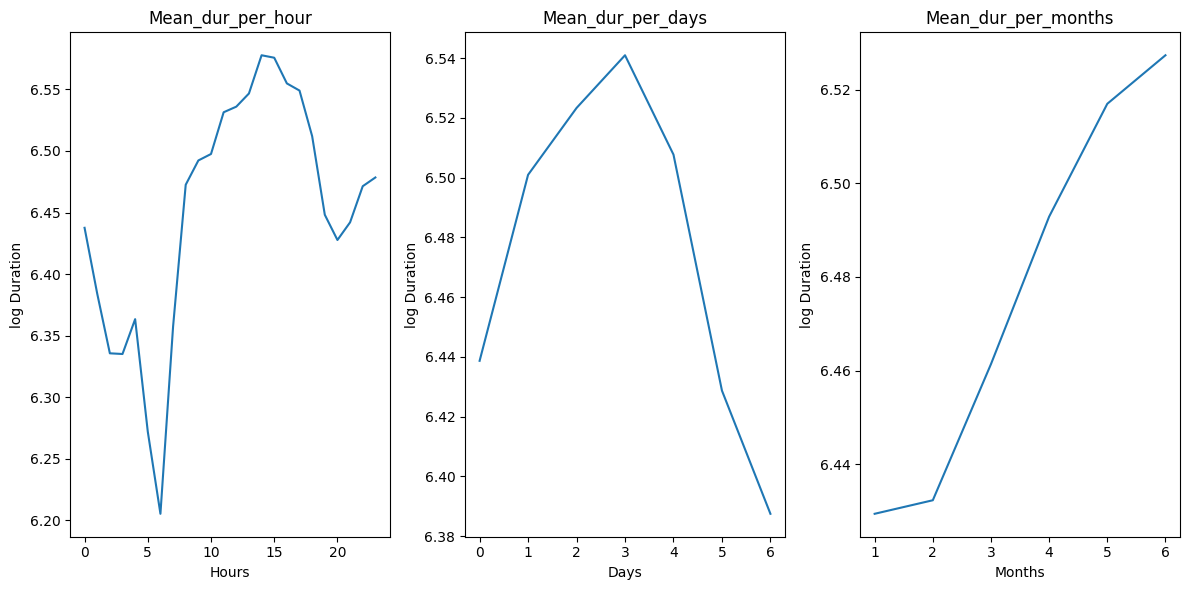

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)  
plt.plot(mean_dur_per_hour['Hour'], mean_dur_per_hour['log_duration'])
plt.title('Mean_dur_per_hour')
plt.xlabel('Hours')
plt.ylabel('log Duration')

plt.subplot(1, 3, 2)  
plt.plot(mean_dur_per_days[('Day')], mean_dur_per_days['log_duration'])
plt.title('Mean_dur_per_days')
plt.xlabel('Days')
plt.ylabel('log Duration')


plt.subplot(1, 3, 3)  
plt.plot(mean_dur_per_month['Month'], mean_dur_per_month['log_duration'])
plt.title('Mean_dur_per_months')
plt.xlabel('Months')
plt.ylabel('log Duration')

plt.tight_layout()
plt.show()

По графикам выше можно сделать вывод, что продолжительность поездки зависит от того, в какой день недели вызвано такси, в какой месяц и в какое время суток. Самые продолжительные поездки у людей в середине недели, а к концу недели становятся минимальными. В течение суток самые короткие поездки поздней ночью и рано утром, а самые длинные в обеденное время. От января к июню продолжительность поездок также росла.

**Посмотрим, как влияют на логарифм таргета другие категориальные переменные**

In [48]:
mean_dur_passenger_count = train.groupby('passenger_count').aggregate({'log_duration': 'mean'}).reset_index()
mean_dur_vendor_id = train.groupby('vendor_id').aggregate({'log_duration': 'mean'}).reset_index()
mean_dur_fwd_flag = train.groupby('store_and_fwd_flag').aggregate({'log_duration': 'mean'}).reset_index()

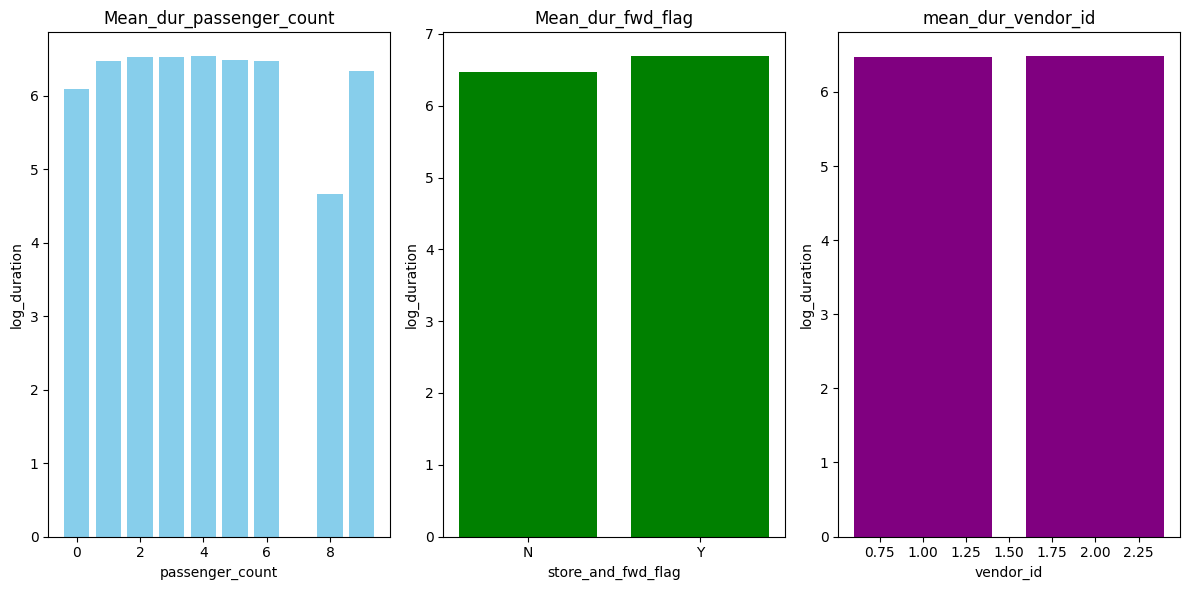

In [49]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)  
plt.bar(mean_dur_passenger_count['passenger_count'], mean_dur_passenger_count['log_duration'], color='skyblue')
plt.title('Mean_dur_passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('log_duration')

plt.subplot(1, 3, 2)  
plt.bar(mean_dur_fwd_flag['store_and_fwd_flag'], mean_dur_fwd_flag['log_duration'], color='green')
plt.title('Mean_dur_fwd_flag')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('log_duration')


plt.subplot(1, 3, 3)  
plt.bar(mean_dur_vendor_id['vendor_id'], mean_dur_vendor_id['log_duration'], color='purple')
plt.title('mean_dur_vendor_id')
plt.xlabel('vendor_id')
plt.ylabel('log_duration')

plt.tight_layout()
plt.show()

Категориальные переменные `store_and_fwd_flag` и `vendor_id` практически не влияют на продолжительность поездки. Были предположения, что один из перевозчиков часто берется за дальние поездки, или что большая компания людей едет на такси дольше, потому что вызывают дорогое такси на всех. Эти догадки не подтвердились.

Странно, что нет статистики для поездок с 7 пассажирами. Но ощутимо меньше продолжительность поездки, когда пассажиров 8. Посмотрим, равномерно ли распределено количество поездок с разным кол-вом пассажиров

,passenger_count,Count
0,0,14
1,1,718182
2,2,146573
3,3,41668
4,4,19690
5,5,54196
6,6,33516
7,8,1
8,9,1


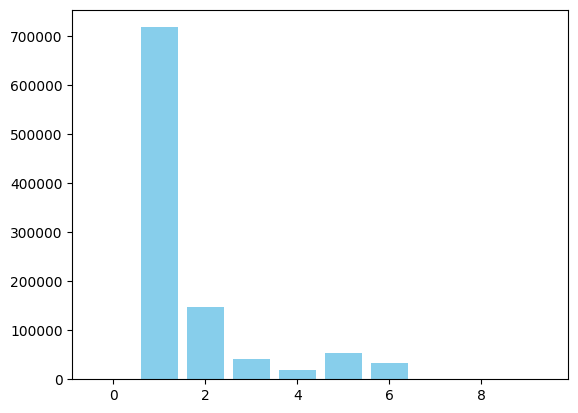

In [50]:
cnt_pass_dur = train.groupby('passenger_count').size().reset_index(name = 'Count')
plt.bar(cnt_pass_dur['passenger_count'], cnt_pass_dur['Count'], color='skyblue')
cnt_pass_dur

По переменной `passenger_count` классы распределены неравномерно. Очевидно, что не может быть поездки с 0 человек, и это, скорее всего, ошибка. Таковых всего 14 наблюдений, поэтому давайте их просто удалим. 

In [51]:
train.drop(train[train['passenger_count'] == 0].index, inplace= True)

/tmp/ipykernel_2199/1003538581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['passenger_count'] == 0].index, inplace= True)


<BarContainer object of 2 artists>

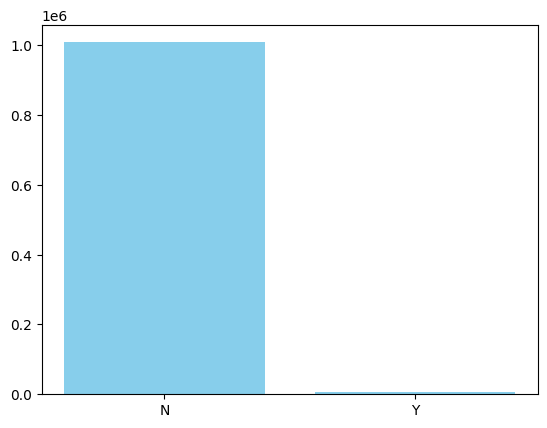

In [52]:
flag_pass_dur = train.groupby('store_and_fwd_flag').size().reset_index(name = 'Count')
plt.bar(flag_pass_dur['store_and_fwd_flag'], flag_pass_dur['Count'], color='skyblue')


В общем-то классы несбалансированные. Для 8 и 9 пассажиров в наборе данных всего лишь по одной поездке, а для 7 пассажиров статистики нет. Для остальных груп средее значение таргета практически не отличается. В общем количество пассажиров тоже не играет роли. Я удалю эту переменную.

<span style="color:red; font-size: 24px;">
Здесь: удаление полей `vendor_id`, `passenger_count`,  `pickup_datetime`, 'id'
</span>


In [53]:
train.drop(['vendor_id', 'passenger_count',  'pickup_datetime','id' ], axis=1, inplace= True)

/tmp/ipykernel_2199/200452981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['vendor_id', 'passenger_count',  'pickup_datetime','id' ], axis=1, inplace= True)


In [54]:
train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_duration,Hour,Day,Month,anomaly_day
0,-73.979813,40.752529,-73.982681,40.763680,N,844,6.739337,9,1,5,0
1,-73.977623,40.746296,-73.968414,40.788933,N,1001,6.909753,16,4,1,0
2,-73.950699,40.779404,-73.863129,40.768608,N,1048,6.955593,13,6,4,0
3,-73.984558,40.721802,-73.976753,40.752213,N,784,6.665684,17,6,1,0
4,-73.967720,40.768742,-73.977173,40.789875,N,732,6.597146,17,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1021045,-73.955032,40.777328,-74.006203,40.749424,N,1281,7.156177,7,4,3,0
1021046,-73.973618,40.763920,-73.983849,40.749874,N,833,6.726233,18,1,2,0
1021047,-74.006195,40.734283,-73.949608,40.785282,N,1285,7.159292,19,1,1,0
1021048,-73.962341,40.767323,-73.969757,40.768669,N,389,5.966147,11,1,1,0


У нас есть координаты начала и конца поездки, значит мы можем добавить поле `log_haversine` - расстояние от посадки до высадки, которое наверняка коррелирует с нашей переменной

Дистанцию мы прологорифмировали, потому что время мы тоже логарифмировали, и корреляция бует сильнее, если прологарифмировать обе переменные

<span style="color:red; font-size: 24px;">
Здесь: добавили поля 'haversine' и 'log_haversine'
</span>

In [55]:
train.loc[:, 'haversine'] = train.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), 
                                                     (row['dropoff_latitude'], row['dropoff_longitude']), 
                                                     unit=Unit.KILOMETERS), axis=1)

/tmp/ipykernel_2199/3241748376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'haversine'] = train.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']),


In [56]:
train['log_haversine'] = np.log(train['haversine']+1)

/tmp/ipykernel_2199/2209842327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_haversine'] = np.log(train['haversine']+1)


In [57]:
train['log_haversine'].corr(train['log_duration'])

0.7772587244145465

In [58]:
train['haversine'].corr(train['log_duration'])

0.5967325963932234

Text(0, 0.5, 'log_duration')

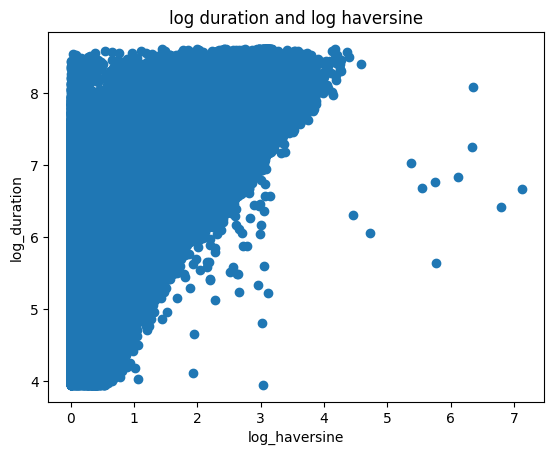

In [59]:
plt.scatter(train['log_haversine'], train['log_duration'])
# plt.xscale('log')
# plt.yscale('log')
plt.title('log duration and log haversine')
plt.xlabel('log_haversine')
plt.ylabel('log_duration')

**Как и было сказано ранее, корреляция между логарифмами действительно выше**

In [60]:
train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_duration,Hour,Day,Month,anomaly_day,haversine,log_haversine
0,-73.979813,40.752529,-73.982681,40.763680,N,844,6.739337,9,1,5,0,1.263189,0.816775
1,-73.977623,40.746296,-73.968414,40.788933,N,1001,6.909753,16,4,1,0,4.804019,1.758551
2,-73.950699,40.779404,-73.863129,40.768608,N,1048,6.955593,13,6,4,0,7.471099,2.136660
3,-73.984558,40.721802,-73.976753,40.752213,N,784,6.665684,17,6,1,0,3.444874,1.491751
4,-73.967720,40.768742,-73.977173,40.789875,N,732,6.597146,17,3,2,0,2.481066,1.247339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,-73.955032,40.777328,-74.006203,40.749424,N,1281,7.156177,7,4,3,0,5.310391,1.842198
1021046,-73.973618,40.763920,-73.983849,40.749874,N,833,6.726233,18,1,2,0,1.783780,1.023810
1021047,-74.006195,40.734283,-73.949608,40.785282,N,1285,7.159292,19,1,1,0,7.407656,2.129143
1021048,-73.962341,40.767323,-73.969757,40.768669,N,389,5.966147,11,1,1,0,0.642216,0.496047


In [61]:
def show_circles_on_map(data, latitude_column, longitude_column, color):

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [64]:
airport_kennedy_coords = (40.6413, -73.7781)
airport_guardia_coords = (40.7769, -73.8740)

def is_near_airport(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon, airport_coords, radius_km):
    pickup_distance = haversine((pickup_lat, pickup_lon), airport_coords, unit=Unit.KILOMETERS)
    dropoff_distance = haversine((dropoff_lat, dropoff_lon), airport_coords, unit=Unit.KILOMETERS)
    
    return int(pickup_distance <= radius_km or dropoff_distance <= radius_km)

train['airport_kennedy_trip'] = train.apply(lambda row: is_near_airport(
    row['pickup_latitude'], row['pickup_longitude'], 
    row['dropoff_latitude'], row['dropoff_longitude'], airport_coords = airport_kennedy_coords, radius_km = 3.5), axis=1)

train['airport_guardia_trip'] = train.apply(lambda row: is_near_airport(
    row['pickup_latitude'], row['pickup_longitude'], 
    row['dropoff_latitude'], row['dropoff_longitude'], airport_coords = airport_guardia_coords, radius_km = 1), axis=1)



/tmp/ipykernel_2199/1202239963.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['airport_kennedy_trip'] = train.apply(lambda row: is_near_airport(
/tmp/ipykernel_2199/1202239963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['airport_guardia_trip'] = train.apply(lambda row: is_near_airport(


In [65]:
train[train['airport_kennedy_trip'] == 1].shape

(29505, 15)

In [66]:
train[train['airport_guardia_trip'] == 1].shape

(21410, 15)

<span style="color:red; font-size: 24px;">
Здесь: Будем кодировать категориальные признаки 'Hour', 'Day', 'Month', 'store_and_fwd_flag'

</span>

**Кодировать буду с помощью Target Encoding. Каждое категориальное значение закодируется средним значением таргета. Хоть до этого признаки целочисленные, но может существовать необоснованная зависимость между ними и таргетом. После Target encoding значения переменной будут больше, если для группы значения таргета больше. В таком случае корреляция будет естественной и согласованной с данными**

In [83]:
target_enc = TargetEncoder(cols=['Hour', 'Day', 'Month', 'store_and_fwd_flag'])

In [85]:
X_encoded = target_enc.fit_transform(train[['Hour', 'Day', 'Month', 'anomaly_day', 'store_and_fwd_flag',
                                            'log_haversine', 'airport_guardia_trip', 'airport_kennedy_trip']], train['log_duration'])

In [86]:
X_encoded

,Hour,Day,Month,anomaly_day,store_and_fwd_flag,log_haversine,airport_guardia_trip,airport_kennedy_trip
0,6.492282,6.500923,6.517026,0,6.475906,0.816775,0,0
1,6.554852,6.507700,6.429362,0,6.475906,1.758551,0,0
2,6.546652,6.387490,6.492898,0,6.475906,2.136660,0,0
3,6.549063,6.387490,6.429362,0,6.475906,1.491751,0,0
4,6.549063,6.540941,6.432297,0,6.475906,1.247339,0,0
...,...,...,...,...,...,...,...,...
1021045,6.357312,6.507700,6.461381,0,6.475906,1.842198,0,0
1021046,6.511978,6.500923,6.432297,0,6.475906,1.023810,0,0
1021047,6.448199,6.500923,6.429362,0,6.475906,2.129143,0,0
1021048,6.531399,6.500923,6.429362,0,6.475906,0.496047,0,0


<span style="color:red; font-size: 24px;">
Здесь: Нормализуем предикторы

</span>

In [100]:
scaler = StandardScaler()


In [101]:
X_encoded[['Hour', 'Day', 'Month', 'log_haversine', 'store_and_fwd_flag']] = scaler.fit_transform(
                    X_encoded[['Hour', 'Day', 'Month', 'log_haversine', 'store_and_fwd_flag']])

In [102]:
X_encoded

,Hour,Day,Month,anomaly_day,store_and_fwd_flag,log_haversine,airport_guardia_trip,airport_kennedy_trip
0,0.193241,0.454134,1.048987,0,-0.074172,-0.712975,0,0
1,0.988138,0.583159,-1.252564,0,-0.074172,0.801479,0,0
2,0.883961,-1.705620,0.415530,0,-0.074172,1.409511,0,0
3,0.914589,-1.705620,-1.252564,0,-0.074172,0.372444,0,0
4,0.914589,1.216072,-1.175525,0,-0.074172,-0.020593,0,0
...,...,...,...,...,...,...,...,...
1021045,-1.521431,0.583159,-0.411943,0,-0.074172,0.935991,0,0
1021046,0.443463,0.454134,-1.175525,0,-0.074172,-0.380046,0,0
1021047,-0.366795,0.454134,-1.252564,0,-0.074172,1.397422,0,0
1021048,0.690188,0.454134,-1.252564,0,-0.074172,-1.228733,0,0


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, train['log_duration'], train_size= 0.999)

In [126]:
# model = LinearRegression()
# model.fit(X_train, y_train)

# # y_pred = model.predict(X_test)

LinearRegression()

In [135]:
model = Lasso()
param_grid = {'alpha': np.linspace(0.01, 20, 100)}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 2.11919192e-01, 4.13838384e-01, 6.15757576e-01,
       8.17676768e-01, 1.01959596e+00, 1.22151515e+00, 1.42343434e+00,
       1.62535354e+00, 1.82727273e+00, 2.02919192e+00, 2.23111111e+00,
       2.43303030e+00, 2.63494949e+00, 2.83686869e+00, 3.03878788e+00,
       3.24070707e+00, 3.44262626e+00, 3.64454545e+00, 3....
       1.53558586e+01, 1.55577778e+01, 1.57596970e+01, 1.59616162e+01,
       1.61635354e+01, 1.63654545e+01, 1.65673737e+01, 1.67692929e+01,
       1.69712121e+01, 1.71731313e+01, 1.73750505e+01, 1.75769697e+01,
       1.77788889e+01, 1.79808081e+01, 1.81827273e+01, 1.83846465e+01,
       1.85865657e+01, 1.87884848e+01, 1.89904040e+01, 1.91923232e+01,
       1.93942424e+01, 1.95961616e+01, 1.97980808e+01, 2.00000000e+01])},
             scoring='neg_mean_squared_error')

In [137]:
model = grid_search.best_estimator_

y_pred = model.predict(X_test)

In [138]:
grid_search.best_params_

{'alpha': 0.01}

In [139]:
mean_squared_error(y_test, y_pred)

0.19762749575333544

**Возвращаемся от логарифмов к основной величине и считаем RMSE**

In [140]:
mean_squared_error(np.exp(y_test) - 1,
                   np.exp(y_pred) - 1
                    )**(0.5)

377.139795212404

**Получаем прогнозы для тестовой выборки**

In [92]:
test_id = test[['id']]

Удаляем лишние фичи и считаем `haversine`

In [93]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

test['Hour'] = test['pickup_datetime'].dt.hour
test['Day'] = test['pickup_datetime'].dt.weekday
test['Month'] = test['pickup_datetime'].dt.month

test['anomaly_day'] = np.where(
    (test['pickup_datetime'].dt.date == pd.to_datetime('2016-01-23').date()) |
    (test['pickup_datetime'].dt.date == pd.to_datetime('2016-01-24').date()), 
    1, 
    0
)

test['haversine'] = test.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), 
                                                     (row['dropoff_latitude'], row['dropoff_longitude']), 
                                                     unit=Unit.KILOMETERS), axis = 1)
test['log_haversine'] = np.log(test['haversine']+1)


test['airport_kennedy_trip'] = test.apply(lambda row: is_near_airport(
    row['pickup_latitude'], row['pickup_longitude'], 
    row['dropoff_latitude'], row['dropoff_longitude'], airport_coords = airport_kennedy_coords, radius_km = 3.5), axis=1)

test['airport_guardia_trip'] = test.apply(lambda row: is_near_airport(
    row['pickup_latitude'], row['pickup_longitude'], 
    row['dropoff_latitude'], row['dropoff_longitude'], airport_coords = airport_guardia_coords, radius_km = 1), axis=1)


test.drop(['vendor_id', 'passenger_count',  'pickup_datetime', 'id', 'haversine' ], axis= 1, inplace= True)

In [94]:
test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Hour,Day,Month,anomaly_day,log_haversine,airport_kennedy_trip,airport_guardia_trip
0,-73.985611,40.735943,-73.980331,40.760468,N,7,2,6,0,1.325231,0,0
1,-73.978394,40.764351,-73.991623,40.749859,N,12,6,4,0,1.084913,0,0
2,-73.989059,40.744389,-73.973381,40.748692,N,2,6,6,0,0.877456,0,0
3,-73.990326,40.731136,-73.991264,40.748917,N,17,3,5,0,1.091474,0,0
4,-73.789497,40.646675,-73.987137,40.759232,N,17,3,5,0,3.083641,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437589,-73.983505,40.766369,-73.984795,40.785965,N,17,2,5,0,1.157413,0,0
437590,-73.968147,40.800476,-73.953979,40.787643,N,11,5,6,0,1.050725,0,0
437591,-74.006210,40.733158,-73.997932,40.722610,N,6,4,5,0,0.860608,0,0
437592,-73.990089,40.728859,-73.991234,40.765404,N,22,6,3,0,1.622304,0,0


Кодируем методом **target encoding8** категориальные переменные

In [95]:
X_encoded_test = target_enc.transform(test[['Hour', 'Day', 'Month', 'anomaly_day', 'store_and_fwd_flag',
                                            'log_haversine', 'airport_guardia_trip', 'airport_kennedy_trip']])

In [96]:
X_encoded_test

,Hour,Day,Month,anomaly_day,store_and_fwd_flag,log_haversine,airport_guardia_trip,airport_kennedy_trip
0,6.357312,6.523283,6.527383,0,6.475906,1.325231,0,0
1,6.535911,6.387490,6.492898,0,6.475906,1.084913,0,0
2,6.335702,6.387490,6.527383,0,6.475906,0.877456,0,0
3,6.549063,6.540941,6.517026,0,6.475906,1.091474,0,0
4,6.549063,6.540941,6.517026,0,6.475906,3.083641,0,1
...,...,...,...,...,...,...,...,...
437589,6.549063,6.523283,6.517026,0,6.475906,1.157413,0,0
437590,6.531399,6.428721,6.527383,0,6.475906,1.050725,0,0
437591,6.205402,6.507700,6.517026,0,6.475906,0.860608,0,0
437592,6.471364,6.387490,6.461381,0,6.475906,1.622304,0,0


Нормализуем данные

In [98]:
# scaler_test = StandardScaler()
X_encoded_test[['Hour', 'Day', 'Month', 'log_haversine',
                'store_and_fwd_flag']] = scaler.transform(X_encoded_test[['Hour', 'Day', 'Month', 'log_haversine', 'store_and_fwd_flag']])

In [99]:
X_encoded_test

,Hour,Day,Month,anomaly_day,store_and_fwd_flag,log_haversine,airport_guardia_trip,airport_kennedy_trip
0,-1.521431,0.879865,1.320908,0,-0.074172,0.104664,0,0
1,0.747503,-1.705620,0.415530,0,-0.074172,-0.281787,0,0
2,-1.795971,-1.705620,1.320908,0,-0.074172,-0.615395,0,0
3,0.914589,1.216072,1.048987,0,-0.074172,-0.271235,0,0
4,0.914589,1.216072,1.048987,0,-0.074172,2.932336,0,1
...,...,...,...,...,...,...,...,...
437589,0.914589,0.879865,1.048987,0,-0.074172,-0.165200,0,0
437590,0.690188,-0.920576,1.320908,0,-0.074172,-0.336763,0,0
437591,-3.451313,0.583159,1.048987,0,-0.074172,-0.642487,0,0
437592,-0.072507,-1.705620,-0.411943,0,-0.074172,0.582383,0,0


Делаем предсказание и возвращаемся от логарифмов к исходной велчине

In [141]:
test_pred = np.exp(model.predict(X_encoded_test)) - 1 

In [142]:
test_id['trip_duration'] = test_pred

/tmp/ipykernel_2199/769479730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id['trip_duration'] = test_pred


In [143]:
test_id

,id,trip_duration
0,id2793718,621.744450
1,id3485529,549.551718
2,id1816614,343.483112
3,id1050851,676.108114
4,id0140657,4179.162586
...,...,...
437589,id2411525,704.161213
437590,id3782154,562.581209
437591,id0699942,317.632261
437592,id3422152,805.643116


In [144]:
test_id.to_csv('my_submission.csv', index= False)

In [145]:
test_id

,id,trip_duration
0,id2793718,621.744450
1,id3485529,549.551718
2,id1816614,343.483112
3,id1050851,676.108114
4,id0140657,4179.162586
...,...,...
437589,id2411525,704.161213
437590,id3782154,562.581209
437591,id0699942,317.632261
437592,id3422152,805.643116
